## Import

In [1]:
import pandas as pd
import numpy as np
import pickle

# model
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# visualize
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# ignore warnings
import warnings ; warnings.filterwarnings('ignore')

## Read data

In [2]:
symphony_feature, chorus_feature, voice_feature, solo_feature = pickle.load(open(f'../data/Feature/Feature_230923.pkl','rb'))

## Feature Transformation

In [3]:
def Transformation(FEATURES, TARGET):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(FEATURES, TARGET, test_size=0.2, random_state=2023)
    # Scaling
    num = ['meansale','cluster_tran_gap','cluster_price_rate','play_time', 'pre_open_gap', 'n_grade','running_time', 'intermission',
           'n_grade', 'n_performance_month','n_performance_rate', 'G1', 'G2', 'G3', 'G4', 'G5', 'price_rate', 
           '100_tran_gap', 'play_gap']
    scaler = StandardScaler()
    X_train[num] = scaler.fit_transform(X_train[num])
    X_test[num] = scaler.transform(X_test[num])
    return X_train, X_test, y_train, y_test 

## Modeling

- 교향곡

In [4]:
X_train, X_test, y_train, y_test = Transformation(symphony_feature.drop('TARGET', axis=1), symphony_feature['TARGET'])
model = PLSRegression(n_components=5)
model.fit(X_train, y_train)

PLSRegression(n_components=5)

In [5]:
# test데이터의 71%를 설명한다.
model.score(X_train, y_train)

0.5361927930741675

In [6]:
# RMSE: 55149.876577811025
print(f'RMSE: {np.sqrt(mean_squared_error(model.predict(X_test), y_test))}')

RMSE: 118.32518224034784


In [7]:
fimportance = pd.Series(model.coef_.flatten(), index=X_train.columns, name='FImportance')
fimportance.abs().sort_values().head()

cluster_2     0.028500
G4            0.174972
play_month    0.271466
vector_0      0.778622
G5            0.835153
Name: FImportance, dtype: float64

<AxesSubplot:>

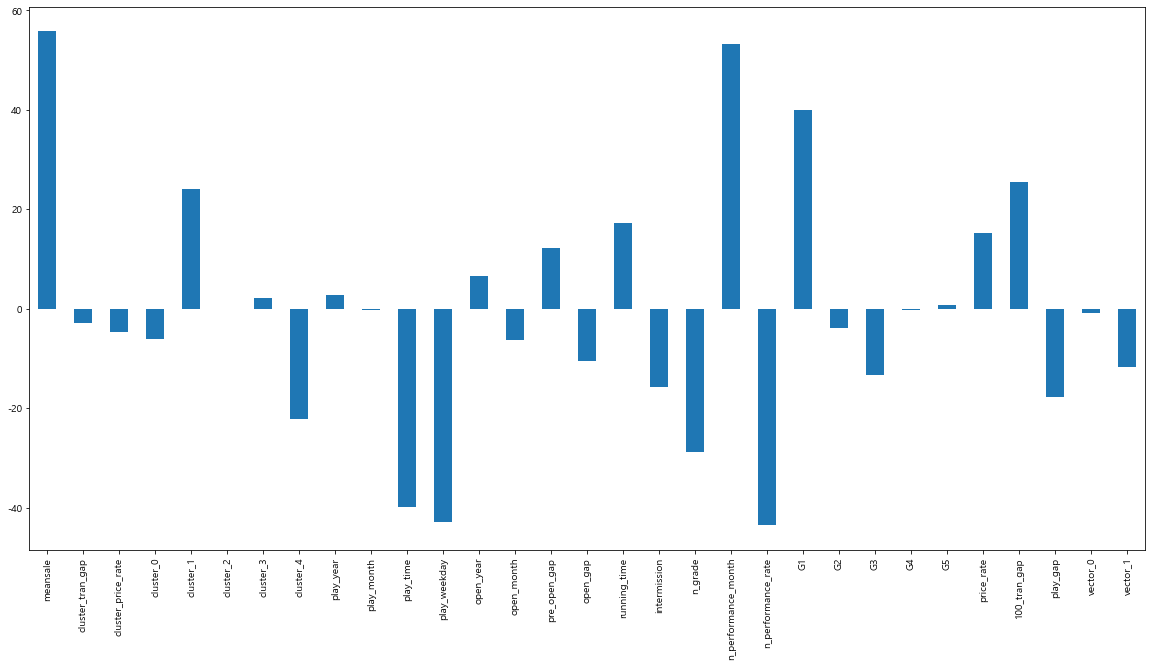

In [8]:
fimportance.plot.bar(figsize=(20,10))

- 합창

In [9]:
X_train, X_test, y_train, y_test = Transformation(chorus_feature.drop('TARGET', axis=1), chorus_feature['TARGET'])
model = PLSRegression(n_components=5)
model.fit(X_train, y_train)

PLSRegression(n_components=5)

In [10]:
# test데이터의 71%를 설명한다.
model.score(X_train, y_train)

0.6957427330278749

In [11]:
# RMSE: 55149.876577811025
print(f'RMSE: {np.sqrt(mean_squared_error(model.predict(X_test), y_test))}')

RMSE: 106.0816009791704


In [12]:
fimportance = pd.Series(model.coef_.flatten(), index=X_train.columns, name='FImportance')
fimportance.abs().sort_values().head()

n_performance_month    3.685595
cluster_2              5.586602
pre_open_gap           5.814911
running_time           6.170718
play_weekday           6.316018
Name: FImportance, dtype: float64

<AxesSubplot:>

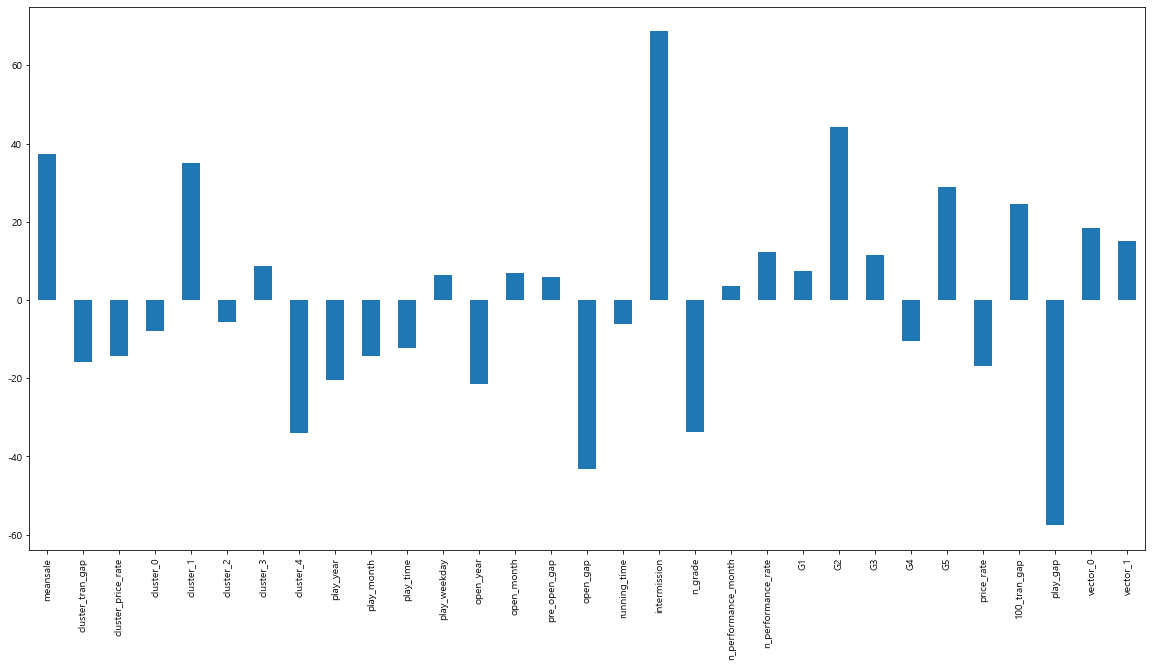

In [13]:
fimportance.plot.bar(figsize=(20,10))

- 성악

In [14]:
X_train, X_test, y_train, y_test = Transformation(voice_feature.drop('TARGET', axis=1), voice_feature['TARGET'])
model = PLSRegression(n_components=5)
model.fit(X_train, y_train)

PLSRegression(n_components=5)

In [15]:
# test데이터의 71%를 설명한다.
model.score(X_train, y_train)

0.7611183222160012

In [16]:
# RMSE: 55149.876577811025
print(f'RMSE: {np.sqrt(mean_squared_error(model.predict(X_test), y_test))}')

RMSE: 109.66632580549866


In [17]:
fimportance = pd.Series(model.coef_.flatten(), index=X_train.columns, name='FImportance')
fimportance.abs().sort_values().head()

G5                     0.000000
cluster_tran_gap       0.197620
n_performance_month    1.054612
play_weekday           3.827039
vector_0               6.323199
Name: FImportance, dtype: float64

<AxesSubplot:>

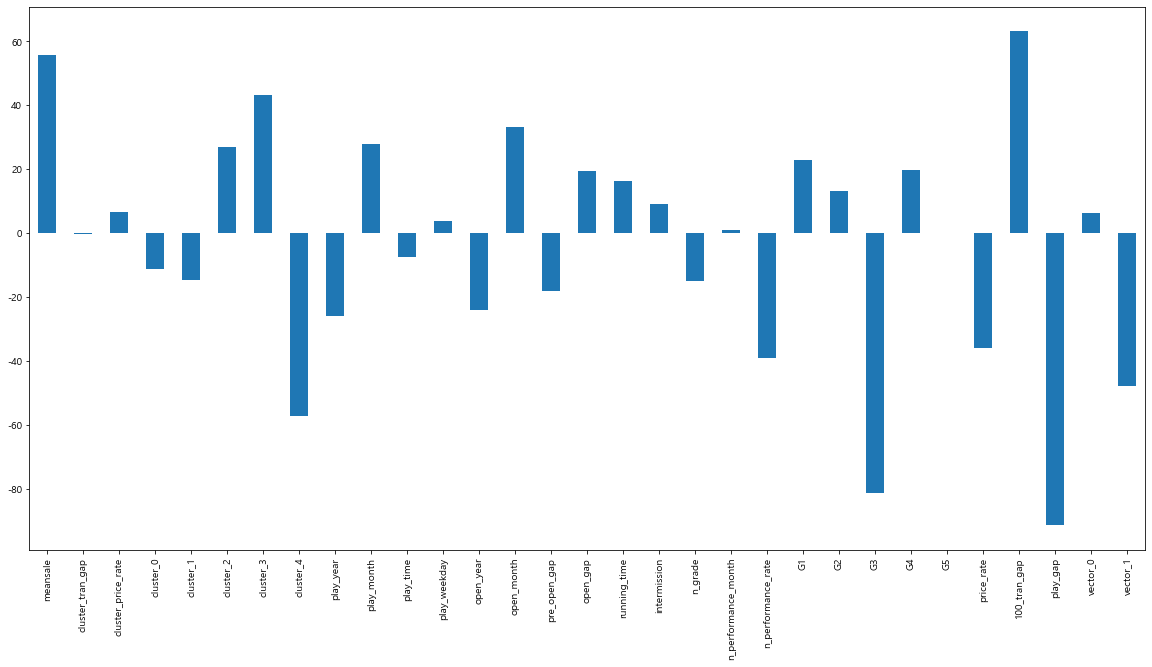

In [18]:
fimportance.plot.bar(figsize=(20,10))

- 독주

In [19]:
X_train, X_test, y_train, y_test = Transformation(solo_feature.drop('TARGET', axis=1), solo_feature['TARGET'])
model = PLSRegression(n_components=5)
model.fit(X_train, y_train)

PLSRegression(n_components=5)

In [20]:
# test데이터의 71%를 설명한다.
model.score(X_train, y_train)

0.6187841729679769

In [21]:
# RMSE: 55149.876577811025
print(f'RMSE: {np.sqrt(mean_squared_error(model.predict(X_test), y_test))}')

RMSE: 65.25564573770795


In [22]:
fimportance = pd.Series(model.coef_.flatten(), index=X_train.columns, name='FImportance')
fimportance.abs().sort_values().head()

cluster_3       0.768036
100_tran_gap    2.513353
G1              3.493737
intermission    4.615523
cluster_4       5.799618
Name: FImportance, dtype: float64

<AxesSubplot:>

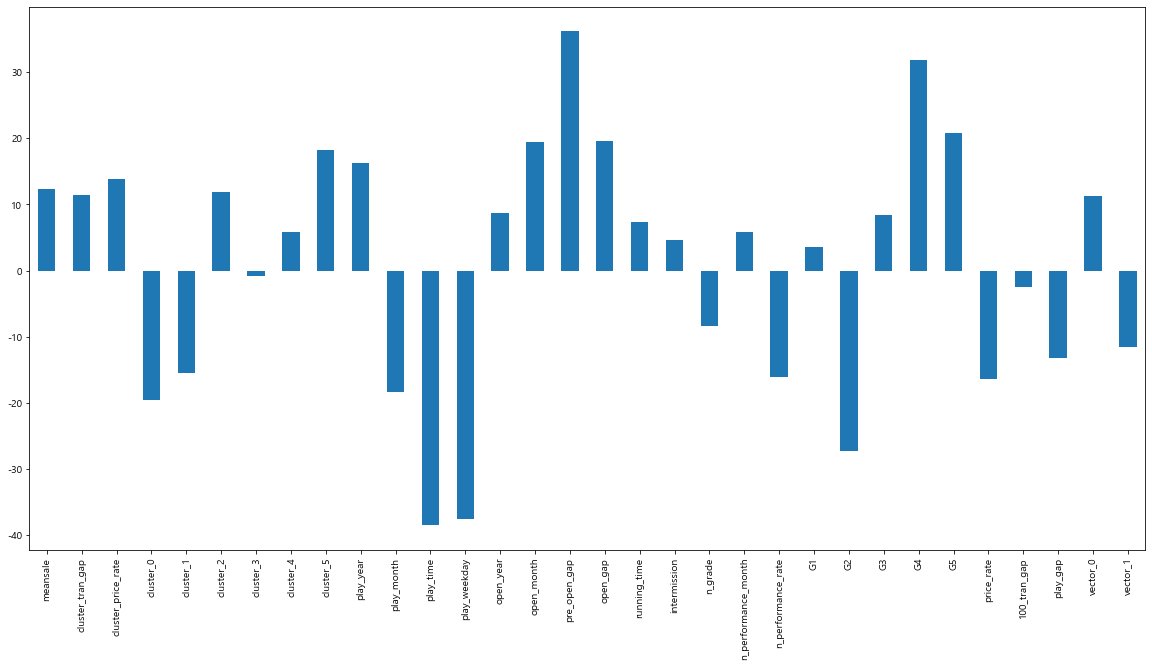

In [23]:
fimportance.plot.bar(figsize=(20,10))

## Save Data